In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# By Pramod Sharma : pramod.sharma@prasami.com

###-----------------
### Import Libraries
###-----------------

import os
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from utils.log_event import fn_log_event


# verify if the directory exists
def fn_dir_exists(_dir):
    '''
    Args:
    	_dir: path if a directory
     '''

    res = os.path.exists(_dir)

    fn_log_event ('-- Directory "{}" exist : {}'.format(_dir, res), 'debug')

    if not res:

        fn_log_event ('-- Directory "{}" does not exists.'.format(_dir), 'debug')

        sys.exit('-- Directory "{}" does not exists.'.format(_dir))

    return res



def fn_file_exists(_file):
    '''
        verify if the file exists
    '''
    res = os.path.exists(_file)

    fn_log_event ('-- File "{}" exist : {}'.format(_file, res), 'debug')

    if not res:

        fn_log_event ('-- File "{}" does not exists.'.format(_file), 'debug')

        sys.exit('-- File "{}" does not exists.'.format(_file))

    return res


###-----------------------------
### Verify or create a directory
###-----------------------------
def fn_verify_dir(_path : str):
    '''
    Arg:
        path: path to verify the directory
    returns:
        create dir if it does not exists
    '''
    if os.path.exists(_path): # check if the path exists. Maybe a file or a folder

        print(_path, ' exists') # advised the user

    else:

        os.makedirs(_path) # create the path

        print("Created folder : ", _path)

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###---------------------------------------------------
### Plot count of classes in training and testing sets
###---------------------------------------------------
def fn_plot_labels(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid()


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid()

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()

def fn_convert_timestamp(tstr):
    '''
        Function to conver string of form "2015-11-12 1444"
    '''

    return datetime.strptime(tstr, "%Y-%m-%d_%H%M")

###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Working with PyTorch - Flowers DataSet

In [3]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import random
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, random_split
from torchsummary import summary
from torchvision.transforms import v2
from torchvision import datasets
import tensorflow as tf

#from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix

In [4]:
###----------------------
### Some basic parameters
###----------------------

inpDir = '../input'
outDir = '../output'
modelDir = '../models'
subDir = 'flower_photos'
altName = 'torch_all_in'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
torch.manual_seed(RANDOM_STATE) # Set Random Seed for reproducible  results
np.random.seed(RANDOM_STATE)

EPOCHS = 201 # number of epochs

BATCH_SIZE = 16

ALPHA = 0.001 # learning rate

TRAIN_SIZE = int(BATCH_SIZE*184) #
TEST_SIZE = 0.2

# Input Image size
IMG_HEIGHT = 186
IMG_WIDTH = 186

# for early stopping
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 10

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
TRAIN_SIZE

2944

## Basic Hygiene

In [6]:
torch.__version__

'2.3.0+cu121'

In [7]:
import torchvision
torchvision.__version__

'0.18.0+cu121'

In [8]:
# Check if all directories are present
if not os.path.exists(os.path.join(outDir)):
    os.makedirs(os.path.join(outDir))
    print ('Created {} directory'.format(outDir))

if not os.path.exists(os.path.join(modelDir, subDir)):
    os.makedirs(os.path.join(modelDir, subDir))
    print ('Created {} directory'.format(os.path.join(modelDir, subDir)))

Created ../output directory
Created ../models/flower_photos directory


In [9]:
def fn_showImages(img, ax):

    img = img.numpy().transpose((1,2,0))  #change to channel last

    means = np.array([0.485, 0.456, 0.406])  #mean as per transforms

    stds = np.array([0.229, 0.224, 0.225])   #std as per transform

    img = stds * img + means     #undo normalization

    img = np.clip(img, 0, 1)     #clip values between [0,1]

    ax.imshow(img)
    ax.axis('off')

In [10]:
print ('Is CUDA available: ', torch.cuda.is_available())

print ('CUDA version: ', torch.version.cuda )

Is CUDA available:  True
CUDA version:  12.1


In [11]:
# Get cpu or gpu device for training.

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using {device} device")

Using cuda device


## Read Flowers data set

In [12]:
###---------------
### Transformation
###---------------

train_transform = v2.Compose([
    v2.Resize(IMG_HEIGHT),

    #augmentation transformations
    v2.RandomRotation(degrees=(-45, +45)),
    v2.CenterCrop(IMG_HEIGHT),
    v2.RandomHorizontalFlip(p=0.2),
    v2.RandomVerticalFlip(p=0.2),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale = True),
    v2.Normalize( mean = [0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = v2.Compose([
    v2.Resize(IMG_HEIGHT),
    v2.CenterCrop(IMG_HEIGHT),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale = True),
    v2.Normalize( mean = [0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  ])


'''
this is where we will add data augmentation
'''
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
#data_dir = os.path.join(inpDir, subDir)

train_dataset = datasets.ImageFolder(data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(data_dir, transform=test_transform)

228813984/228813984 [==============================] - 11s 0us/step


In [13]:
image, label = next(iter(train_dataset))
image.shape, label

(torch.Size([3, 186, 186]), 0)

In [14]:
dataset_size = len(train_dataset)

indices = torch.randperm(dataset_size).tolist()

train_dataset = torch.utils.data.Subset(train_dataset, indices[:TRAIN_SIZE])

test_dataset = torch.utils.data.Subset(test_dataset, indices[TRAIN_SIZE:])

len(train_dataset), len(test_dataset)


(2944, 726)

## Data Loader

In [15]:
#torch.utils.data.DataLoader?

In [16]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle= True)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle= True)


trainSteps = len(train_dataloader.dataset) // BATCH_SIZE

testSteps = len(test_dataloader.dataset) // BATCH_SIZE

print (trainSteps, testSteps)

184 45


In [17]:
class_names = {count: nClass for count, nClass in enumerate(train_dataset.dataset.classes)}
class_names

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [18]:
numClasses = len(class_names)
numClasses

5

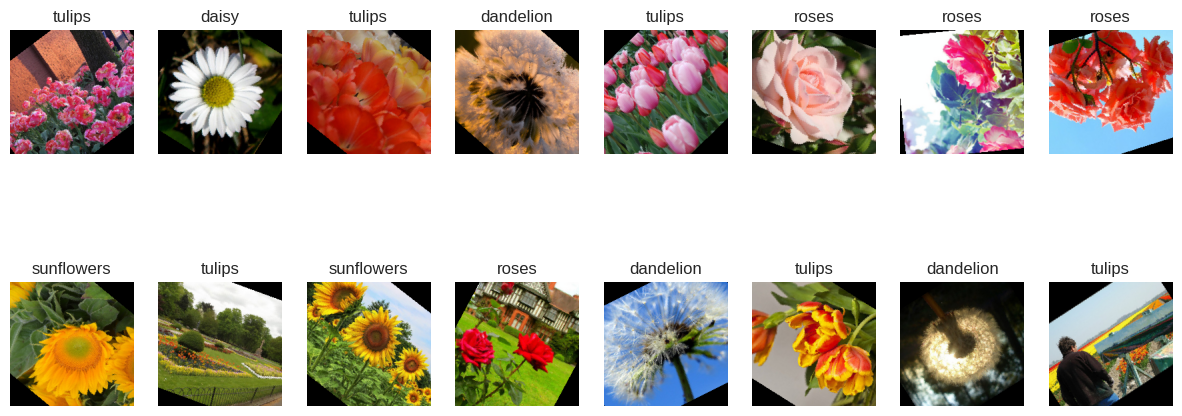

In [19]:
images, labels =next(iter(train_dataloader))

#print (images.shape, labels.shape)

fig = plt.figure()

for i in range (BATCH_SIZE):

    ax = fig.add_subplot(BATCH_SIZE//8, 8, i+1)

    fn_showImages(images[i], ax)

    ax.set_title(class_names[labels[i].item()])

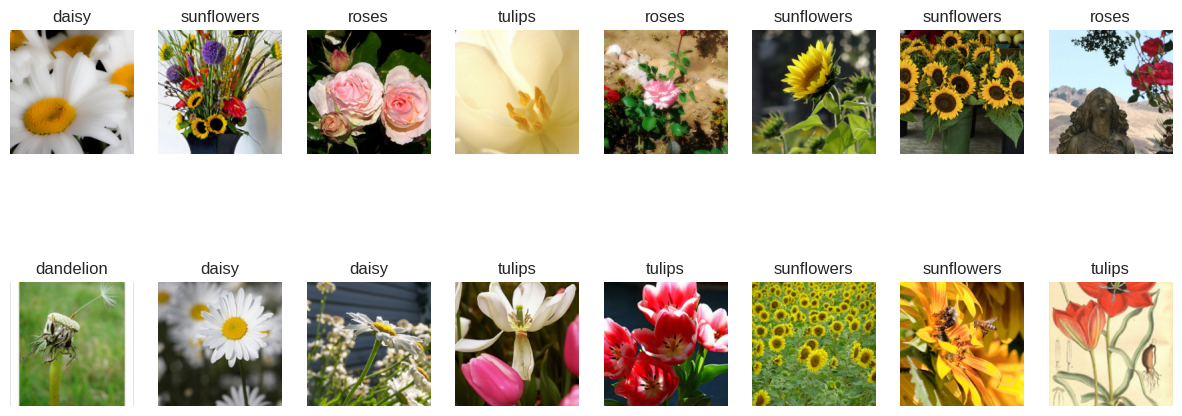

In [20]:
images, labels =next(iter(test_dataloader))

#print (images.shape, labels.shape)

fig = plt.figure()

for i in range (BATCH_SIZE):

    ax = fig.add_subplot(BATCH_SIZE//8, 8, i+1)

    fn_showImages(images[i], ax)

    ax.set_title(class_names[labels[i].item()])

In [21]:
class LeNet(nn.Module):

    def __init__(self, numChannels, classes) :

        #call parent constructor
        super(LeNet, self).__init__()

        #dropouts
        dor1 = 0.3
        dor2 = 0.4
        dor3 = 0.4
        dor4 = 0.5
        dor5 = 0.6

        #Define Layers

        # Set 1
        out_channels1 = 32
        # conv --> BN --> LeakyRelu --> Pool --> DO
        self.conv1 = nn.Conv2d(in_channels = numChannels,
                              out_channels = out_channels1,
                              kernel_size = (3,3)) #output_shape 184, 184, 128

        self.bn1 = nn.BatchNorm2d(out_channels1)
        self.actv1 = nn.LeakyReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(4,4),
                                    stride=(4,4))  #output_shape 46 X 46 X 128
        self.dropout1 = nn.Dropout(p=dor1)


        #---------------------------------------------------------------------------------------

        # Set 2
        out_channels2 = 128
        # conv --> BN --> LeakyRelu --> Pool --> DO
        self.conv2 = nn.Conv2d(in_channels = out_channels1,
                              out_channels = out_channels2,
                              kernel_size = (3,3)) #output_shape 44, 44, 128
        self.bn2 = nn.BatchNorm2d(out_channels2)
        self.actv2 = nn.LeakyReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2),
                                    stride=(2,2))  #output_shape 22 X 22 X 128
        self.dropout2 = nn.Dropout(p=dor2)

        #---------------------------------------------------------------------------------------

        # Set 3
        out_channels3 = 256
        # conv --> BN --> LeakyRelu --> Pool --> DO
        self.conv3 = nn.Conv2d(in_channels = out_channels2,
                              out_channels = out_channels3,
                              kernel_size = (3,3)) #output_shape 20, 20, 256
        self.bn3 = nn.BatchNorm2d(out_channels3)
        self.actv3 = nn.LeakyReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2,2),
                                    stride=(2,2))  #output_shape 10 X 10 X 256
        self.dropout3 = nn.Dropout(p=dor3)

        #---------------------------------------------------------------------------------------

        # Set 4
        out_channels4 = 256
        # conv --> BN --> LeakyRelu --> Pool --> DO
        self.conv4 = nn.Conv2d(in_channels = out_channels3,
                              out_channels = out_channels4,
                              kernel_size = (3,3)) #output_shape 8, 8, 512
        self.bn4 = nn.BatchNorm2d(out_channels4)
        self.actv4 = nn.LeakyReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=(2,2),
                                    stride=(2,2))  #output_shape 4 X 4 X 512
        self.dropout4 = nn.Dropout(p=dor4)

        #---------------------------------------------------------------------------------------

        # Head
        out_channels5 = 1024
        # Linear --> BN --> LeakyRelu --> Pool --> DO
        self.fc1 = nn.Linear(in_features = 4 * 4 * out_channels4,
                              out_features = out_channels5) #output_shape = 1024
        self.bn5 = nn.BatchNorm1d(out_channels5)
        self.actv5 = nn.LeakyReLU()
        self.dropout5 = nn.Dropout(p=dor5)


        # final output layer
        self.fc2 = nn.Linear(in_features = out_channels5,
                              out_features = classes) #output_shape = 1024
        self.logSoftmax = nn.LogSoftmax(dim=1)

    def forward(self,x):
        #pass through 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.actv1(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)

        #pass through 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.actv2(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)


        #pass through 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.actv3(x)
        x = self.maxpool3(x)
        x = self.dropout3(x)

        #pass through 4
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.actv4(x)
        x = self.maxpool4(x)
        x = self.dropout4(x)

        x = torch.flatten(x,1) #flattening the layers

        #head fully connected layers
        x = self.fc1(x)
        x = self.bn5(x)
        x = self.actv5(x)
        x = self.dropout5(x)

        #output
        x = self.fc2(x)
        return self.logSoftmax(x)

In [22]:
numChannels = 3

model = LeNet(numChannels = numChannels, classes=numClasses).to(device)

summary(model, (numChannels, IMG_HEIGHT, IMG_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 184, 184]             896
       BatchNorm2d-2         [-1, 32, 184, 184]              64
         LeakyReLU-3         [-1, 32, 184, 184]               0
         MaxPool2d-4           [-1, 32, 46, 46]               0
           Dropout-5           [-1, 32, 46, 46]               0
            Conv2d-6          [-1, 128, 44, 44]          36,992
       BatchNorm2d-7          [-1, 128, 44, 44]             256
         LeakyReLU-8          [-1, 128, 44, 44]               0
         MaxPool2d-9          [-1, 128, 22, 22]               0
          Dropout-10          [-1, 128, 22, 22]               0
           Conv2d-11          [-1, 256, 20, 20]         295,168
      BatchNorm2d-12          [-1, 256, 20, 20]             512
        LeakyReLU-13          [-1, 256, 20, 20]               0
        MaxPool2d-14          [-1, 256,

In [23]:
#Inittialize out optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(),
                             lr = ALPHA)

loss_fn = nn.CrossEntropyLoss() # cross entropy loss

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                         factor = LR_FACTOR,
                                                         patience=LR_PATIENCE,
                                                         min_lr=1e-5)
H = {
    'Epoch' : [],
    'Train Loss' : [],
    'Test Loss' : [],
    'Train Acc' : [],
    'Test Acc' : [],
    'Alpha' : [],
    'Patience' : []
}
print('done')

done


In [24]:
#Min Loss
minLoss = float('inf')
#path to save the model
savePath = os.path.join(modelDir, subDir, 'flowers.pth')

#train the model for multiple epochs

for epoch in range(EPOCHS):
    #timer
    epochStart = time.time()

    #training loop
    train_loss = 0.0
    train_acc = 0.0

    for i, data in enumerate(train_dataloader):
        model.train()
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        batch_loss = loss_fn(outputs, labels)
        batch_acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
        batch_loss.backward()
        optimizer.step()
        train_loss += batch_loss.item() * inputs.size(0)
        train_acc += batch_acc * inputs.size(0)

    train_loss /= len(train_dataset)
    train_acc /= len(train_dataset)

    H['Train Loss'].append(train_loss)
    H['Train Acc'].append(train_acc)

    # Testing loop
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad():
        model.eval()

        for data in test_dataloader:

            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            preds = torch.argmax(outputs, dim = 1)

            batch_loss = loss_fn(outputs, labels)

            batch_acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())

            test_loss += batch_loss.item() * inputs.size(0)
            test_acc += batch_acc* inputs.size(0)

        test_loss /= len(test_dataset)
        test_acc /= len(test_dataset)

        H['Test Loss'].append(test_loss)
        H['Test Acc'].append(test_acc)

    H['Epoch'].append(epoch)

    #Step schedulee
    lr_scheduler.step(test_loss)

    ## add early stopping/ saving the model
    if test_loss < minLoss:
        minLoss = test_loss
        counter = 0
        #saving model
        torch.save({ 'epoch': epoch+1,
                   'model_state_dict': model.state_dict(),
                   'optimizer_state_dict': optimizer.state_dict(),
                   'loss': loss_fn,}, savePath )
    else:
        counter +=1
    if counter > PATIENCE:
        break
    #----------------------------------
    curr_alpha = lr_scheduler.get_last_lr()[0]
    H['Alpha'].append(curr_alpha)
    H['Patience'].append(counter)

    if epoch%5 == 0:
        #print the model training and validation information
        print(f' Epoch {epoch:3d}/{EPOCHS:3d}', end= ' ')
        print(f' Loss  {train_loss:.6f}/{test_loss:.6f}, Accuracy: {train_acc:.4f}/{test_acc:.4f}', end= ' ')
        print(f' Alpha {curr_alpha:.6f}, ES: {counter:2d}', end= ' ')
        print(f' Epoch time: {time.time() - epochStart:.2f} Sec')


 Epoch   0/201  Loss  1.340079/1.455018, Accuracy: 0.4626/0.3237  Alpha 0.001000, ES:  0  Epoch time: 20.82 Sec
 Epoch   5/201  Loss  0.955050/1.189723, Accuracy: 0.6332/0.5510  Alpha 0.001000, ES:  2  Epoch time: 19.95 Sec
 Epoch  10/201  Loss  0.810168/1.155777, Accuracy: 0.6858/0.5758  Alpha 0.001000, ES:  3  Epoch time: 20.32 Sec
 Epoch  15/201  Loss  0.770293/0.898653, Accuracy: 0.7069/0.6708  Alpha 0.001000, ES:  2  Epoch time: 19.82 Sec
 Epoch  20/201  Loss  0.702602/0.830296, Accuracy: 0.7337/0.6860  Alpha 0.001000, ES:  1  Epoch time: 20.71 Sec
 Epoch  25/201  Loss  0.685037/0.590603, Accuracy: 0.7422/0.7713  Alpha 0.001000, ES:  0  Epoch time: 19.86 Sec
 Epoch  30/201  Loss  0.617997/0.628236, Accuracy: 0.7643/0.7576  Alpha 0.001000, ES:  5  Epoch time: 19.61 Sec
 Epoch  35/201  Loss  0.594484/0.598415, Accuracy: 0.7721/0.7727  Alpha 0.001000, ES:  1  Epoch time: 19.71 Sec
 Epoch  40/201  Loss  0.565775/0.559649, Accuracy: 0.7925/0.7961  Alpha 0.001000, ES:  6  Epoch time: 19

In [25]:
loss_df = pd.DataFrame({'epoch' : H['Epoch'], 'train_loss' : H['Train Loss'], 'test_loss': H['Test Loss'], 'acc' : H['Train Acc'], 'test_acc': H['Test Acc']})
loss_df.head()

,epoch,train_loss,test_loss,acc,test_acc
0,0,1.340079,1.455018,0.462636,0.323691
1,1,1.170414,1.890777,0.543139,0.290634
2,2,1.077147,1.328033,0.585938,0.534435
3,3,1.041156,1.001232,0.596128,0.606061
4,4,1.007385,1.332850,0.618886,0.473829


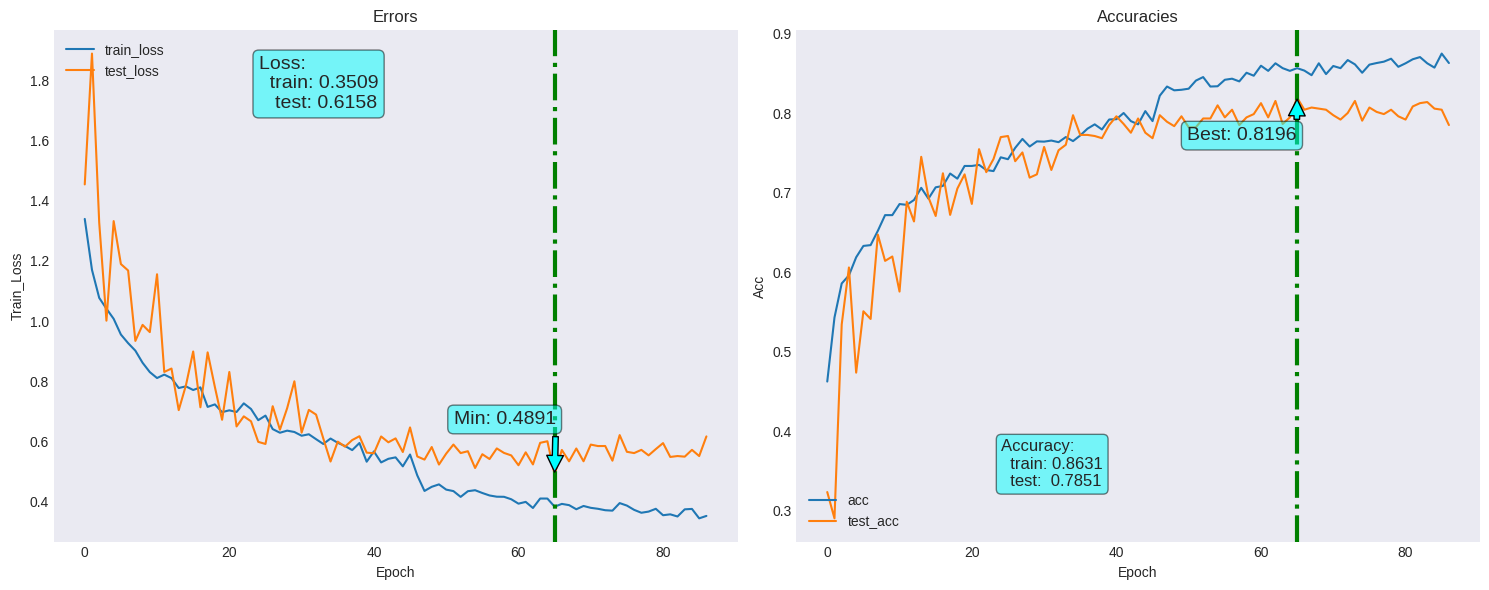

In [26]:
fn_plot_torch_hist(loss_df)